
📊 Processing AAPL...


[*********************100%***********************]  1 of 1 completed


📈 Predicted Prices for the next 10 days:
            Predicted Price
Date                       
2025-05-12       209.806961
2025-05-13       211.856221
2025-05-14       211.281671
2025-05-15       210.438979
2025-05-16       210.257034
2025-05-19       207.882194
2025-05-20       206.043608
2025-05-21       201.475860
2025-05-22       200.776818
2025-05-23       194.945049
🎯 Model Accuracy:
   Accuracy: 95.65%
   R² Score: 0.9435
   MAPE: 4.35%


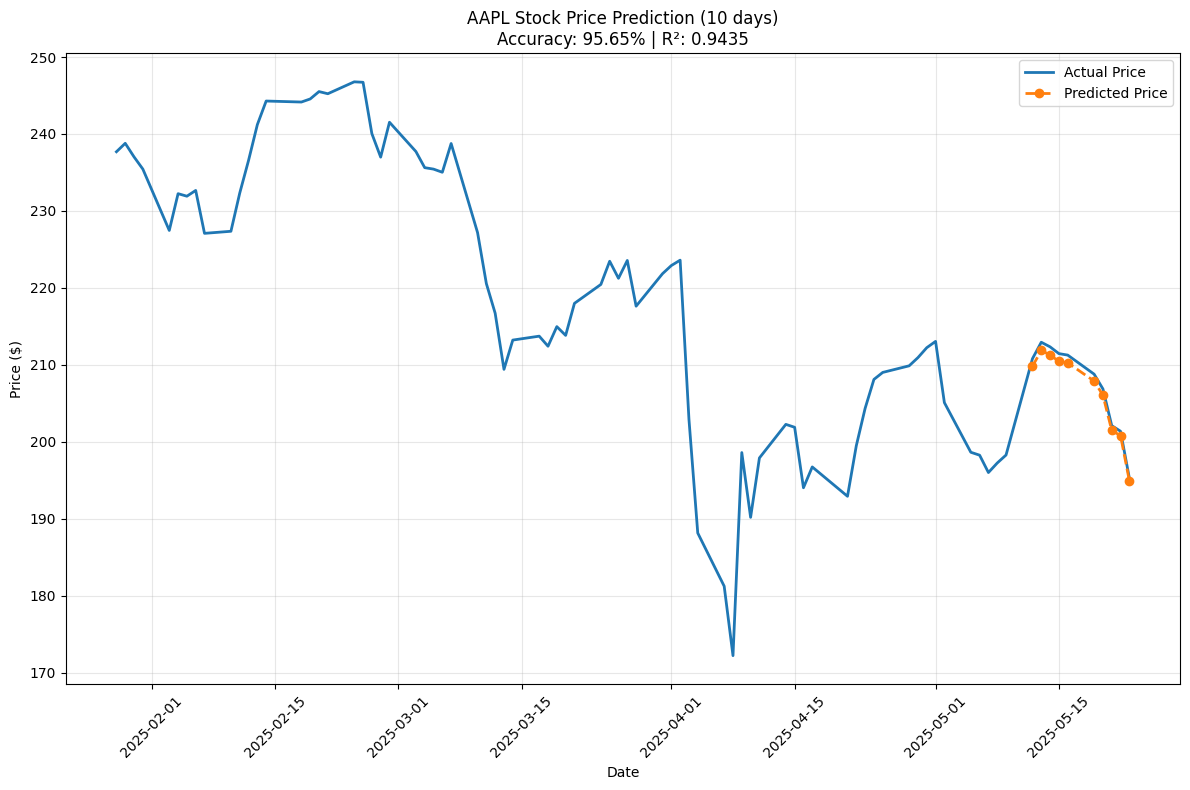


📊 Processing MSFT...


[*********************100%***********************]  1 of 1 completed


📈 Predicted Prices for the next 10 days:
            Predicted Price
Date                       
2025-05-12       448.453614
2025-05-13       448.335707
2025-05-14       452.070275
2025-05-15       453.074580
2025-05-16       454.197003
2025-05-19       458.726145
2025-05-20       458.036946
2025-05-21       452.523210
2025-05-22       454.777910
2025-05-23       450.170014
🎯 Model Accuracy:
   Accuracy: 96.20%
   R² Score: 0.9636
   MAPE: 3.80%


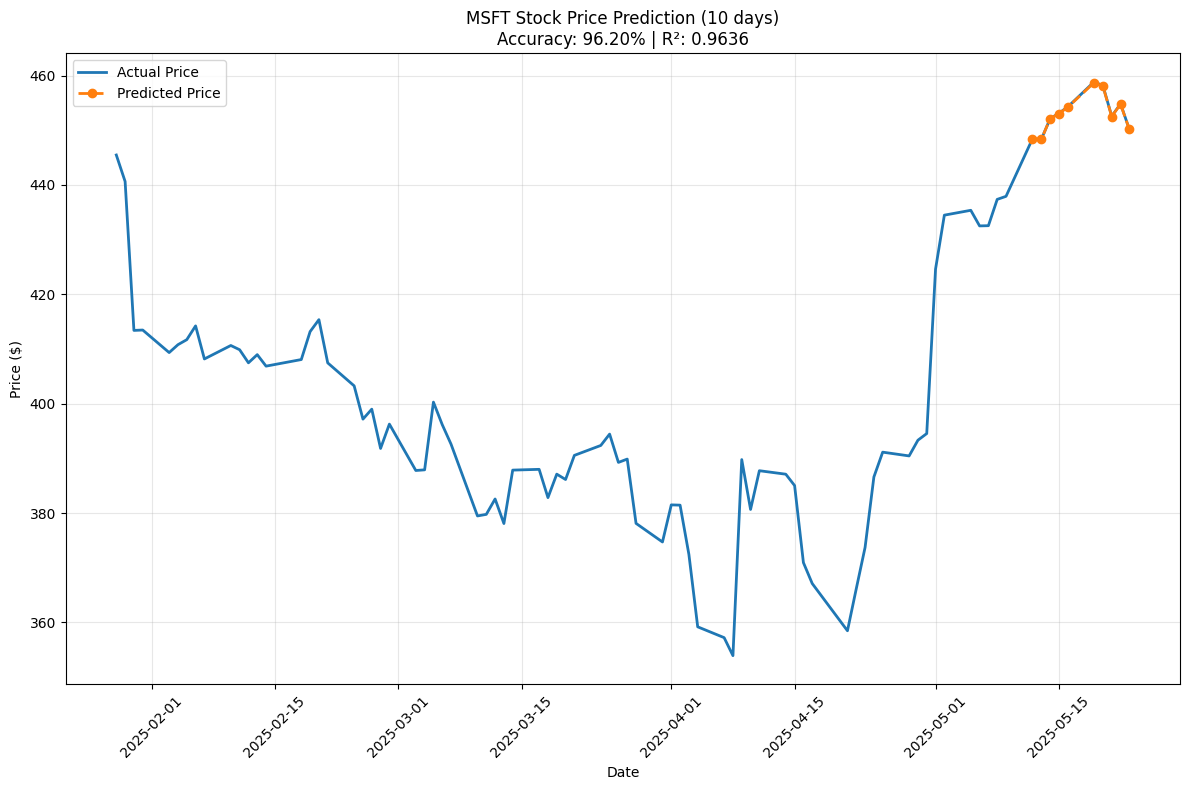


📊 Processing GOOGL...


[*********************100%***********************]  1 of 1 completed


📈 Predicted Prices for the next 10 days:
            Predicted Price
Date                       
2025-05-12       158.210275
2025-05-13       159.246593
2025-05-14       164.902794
2025-05-15       163.537181
2025-05-16       165.696994
2025-05-19       166.035970
2025-05-20       163.556540
2025-05-21       167.992402
2025-05-22       170.229699
2025-05-23       167.905238
🎯 Model Accuracy:
   Accuracy: 95.66%
   R² Score: 0.9503
   MAPE: 4.34%


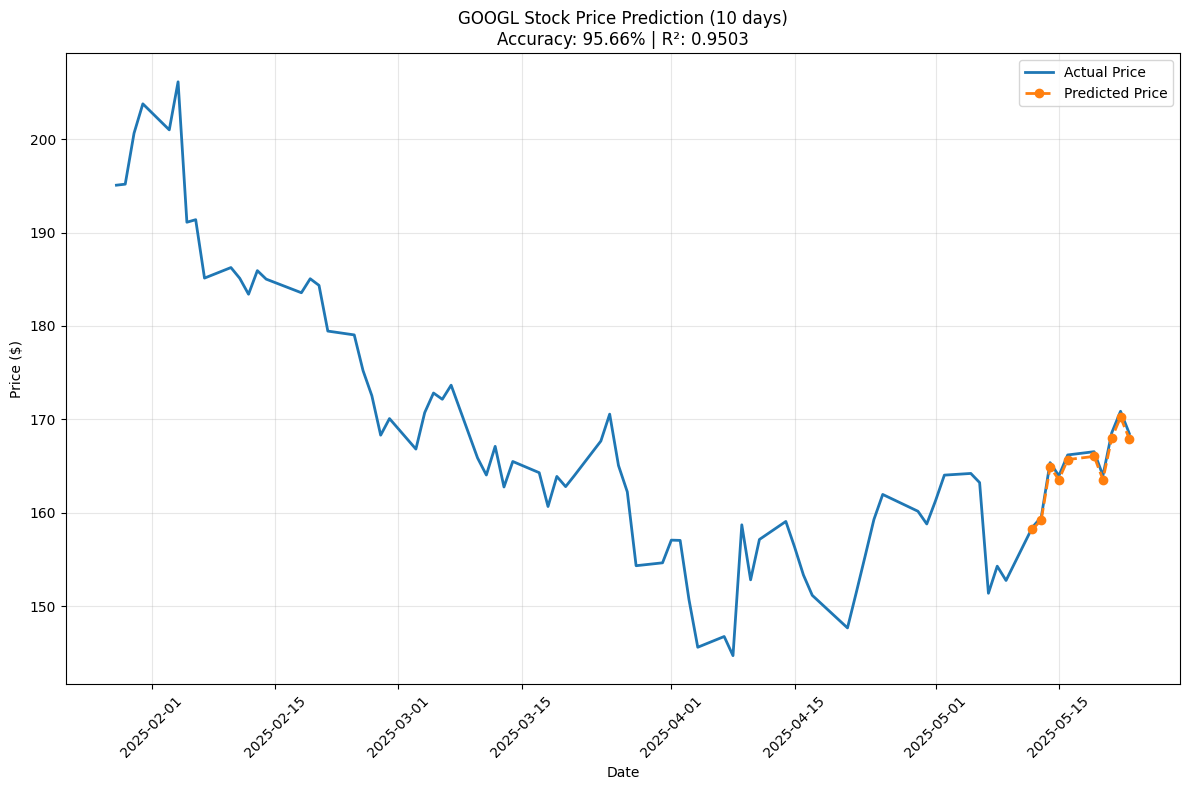


📊 Processing AMZN...


[*********************100%***********************]  1 of 1 completed


📈 Predicted Prices for the next 10 days:
            Predicted Price
Date                       
2025-05-12       207.124686
2025-05-13       209.745779
2025-05-14       208.670462
2025-05-15       203.793107
2025-05-16       204.196351
2025-05-19       204.743620
2025-05-20       202.736996
2025-05-21       199.904664
2025-05-22       201.805690
2025-05-23       199.779859
🎯 Model Accuracy:
   Accuracy: 94.87%
   R² Score: 0.9105
   MAPE: 5.13%


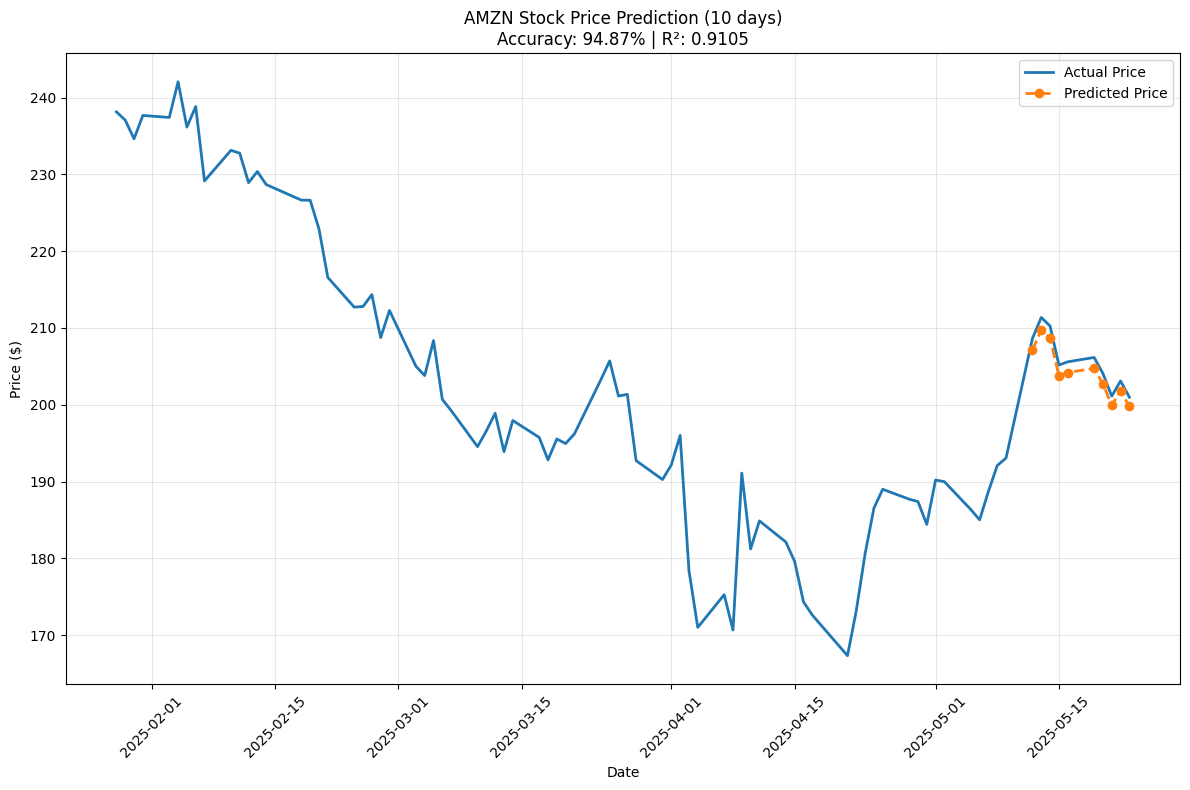


📊 Processing TSLA...


[*********************100%***********************]  1 of 1 completed


📈 Predicted Prices for the next 10 days:
            Predicted Price
Date                       
2025-05-12       311.364336
2025-05-13       325.330778
2025-05-14       337.445696
2025-05-15       333.119584
2025-05-16       339.493055
2025-05-19       332.469765
2025-05-20       334.009733
2025-05-21       325.820350
2025-05-22       331.535119
2025-05-23       330.021855
🎯 Model Accuracy:
   Accuracy: 89.90%
   R² Score: 0.8172
   MAPE: 10.10%


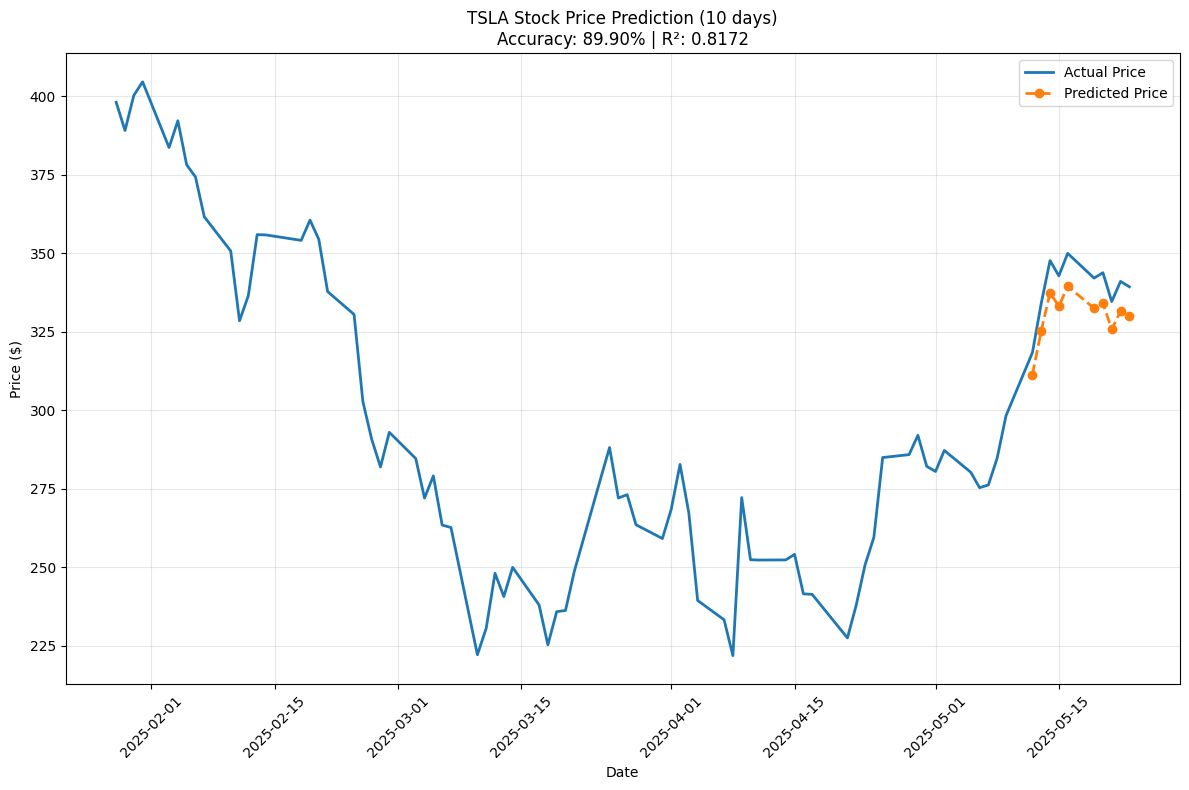

In [4]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# List of stocks to predict
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Data range to use in the model
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 5)  # Use 5 years of data for training

forecast_days = 10  # Predict 10 days ahead

# Downloading and processing data
for ticker in stocks:
    print(f"\n📊 Processing {ticker}...")

    try:
        # Download stock data
        df = yf.download(ticker, start=start_date, end=end_date)
        df = df[['Close']]
        df.dropna(inplace=True)

        # Prepare data
        df['Prediction'] = df['Close'].shift(-forecast_days)
        X = df[['Close']][:-forecast_days]
        y = df['Prediction'][:-forecast_days]

        # Train model
        model = LinearRegression()
        model.fit(X, y)

        # Calculate accuracy on training data
        y_pred_train = model.predict(X)
        
        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = (abs(y - y_pred_train) / y * 100).mean()
        accuracy = 100 - mape
        
        # Calculate R-squared score
        from sklearn.metrics import r2_score
        r2 = r2_score(y, y_pred_train)

        # Predict
        x_future = df[['Close']][-forecast_days:]
        forecast = model.predict(x_future)

        # Show predicted prices
        prediction_dates = df.index[-forecast_days:]
        forecast_df = pd.DataFrame({'Date': prediction_dates, 'Predicted Price': forecast})
        forecast_df.set_index('Date', inplace=True)

        print("📈 Predicted Prices for the next", forecast_days, "days:")
        print(forecast_df)
        
        print(f"🎯 Model Accuracy:")
        print(f"   Accuracy: {accuracy:.2f}%")
        print(f"   R² Score: {r2:.4f}")
        print(f"   MAPE: {mape:.2f}%")

        # Plot results - showing only last 4 months
        plt.figure(figsize=(12, 8))
        plt.title(f'{ticker} Stock Price Prediction ({forecast_days} days)\nAccuracy: {accuracy:.2f}% | R²: {r2:.4f}')
        
        # Filter data to show only last 4 months
        four_months_ago = end_date - timedelta(days=120)  # Approximately 4 months
        recent_data = df[df.index >= four_months_ago]
        
        plt.plot(recent_data['Close'], label='Actual Price', linewidth=2)
        plt.plot(forecast_df['Predicted Price'], label='Predicted Price', linestyle='--', linewidth=2, marker='o')
        
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")